In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay


In [3]:
tweet_df = pd.read_csv("/home/dheerus/Desktop/Python/Hate Speech Detection Project/FinalBalancedDataset.csv")

In [6]:
tweet_df.describe()

,Unnamed: 0,Toxicity
count,56745.00000,56745.000000
mean,28372.00000,0.425641
std,16381.01485,0.494444
min,0.00000,0.000000
25%,14186.00000,0.000000
50%,28372.00000,0.000000
75%,42558.00000,1.000000
max,56744.00000,1.000000


In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


# Visualizing the Data to preprocess

In [52]:
print(tweet_df['tweet'].iloc[0],'\n')
print(tweet_df['tweet'].iloc[1],'\n')
print(tweet_df['tweet'].iloc[2],'\n')
print(tweet_df['tweet'].iloc[3],'\n')
print(tweet_df['tweet'].iloc[4],'\n')

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



## Data processing

##### -Convertin the data into lower case 
##### -Removing special characters using regex
##### -Performing Tokenization
##### -Performing Lemmatization

In [53]:
def data_preprocessing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+","", tweet,flags = re.MULTILINE)
    tweet = re.sub(r"@w+|\#","",tweet)
    tweet = re.sub(r"[^\w\s]","",tweet)
    tweet = re.sub(r"","",tweet)
    tweet = re.sub(r"ð","",tweet)
    tweet = re.sub(r"  ","",tweet)

    tweet_tokens = word_tokenize(tweet)
    filterted_tokens =[w for w in tweet_tokens if not w in stop_words]
    return tweet

In [54]:
tweet_df.tweet = tweet_df['tweet'].apply(data_preprocessing)

##### Removing Duplicates from data

In [55]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [56]:
lemmatizer = WordNetLemmatizer()

def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [57]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))


##### Preprocessed data

In [58]:
print(tweet_df['tweet'].iloc[0],'\n')
print(tweet_df['tweet'].iloc[1],'\n')
print(tweet_df['tweet'].iloc[2],'\n')
print(tweet_df['tweet'].iloc[3],'\n')
print(tweet_df['tweet'].iloc[4],'\n')

 user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run 

user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdxdisapointed getthanked 

bihday your majesty 

model i love u take with u all the time in ur  

 factsguide society nowmotivation 



In [59]:
tweet_df.mean()

Unnamed: 0    28828.064174
Toxicity          0.440493
dtype: float64

In [60]:
print(tweet_df.describe())
tweet_df.info()

         Unnamed: 0      Toxicity
count  54212.000000  54212.000000
mean   28828.064174      0.440493
std    16494.221829      0.496451
min        0.000000      0.000000
25%    14450.750000      0.000000
50%    29349.500000      0.000000
75%    43164.250000      1.000000
max    56744.000000      1.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54212 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54212 non-null  int64 
 1   Toxicity    54212 non-null  int64 
 2   tweet       54212 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


In [61]:
tweet_df['Toxicity'].value_counts()

0    30332
1    23880
Name: Toxicity, dtype: int64

<AxesSubplot:xlabel='Toxicity', ylabel='count'>

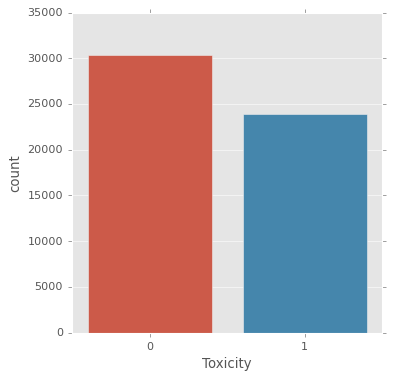

In [62]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Toxicity', data = tweet_df)

Text(0.5, 1.0, 'Dist')

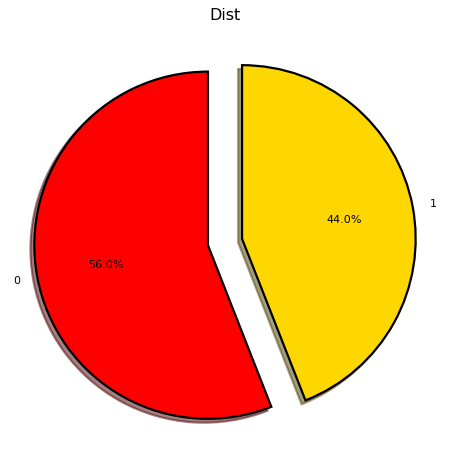

In [63]:
fig = plt.figure(figsize =(7,7))
colors = ("red",'gold')
wp = {'linewidth':2,'edgecolor':"black"}
tags = tweet_df['Toxicity'].value_counts()
explode = (0.1,0.1)
tags.plot(kind = 'pie', autopct = "%1.1f%%", shadow = True, colors = colors, startangle=90,
wedgeprops = wp, explode = explode,label ='')
plt.title("Dist")

##### Vectorizing the Data
##### 2gram 

In [64]:
vect = TfidfVectorizer(ngram_range =(1,2)).fit(tweet_df['tweet'])

In [65]:
feature_names  = vect.get_feature_names()
print("No.of feature: {}".format(len(feature_names)))
print("First 20 features {}".format(feature_names[:20]))


No.of feature: 417487
First 20 features ['0000001', '0000001 polluting', '00027', '00027 photooftheday', '001', '0035', '007', '007 httptcoon5t60rmfb', '007beardownjedi', '007beardownjedi the', '007hertzrumble', '007hertzrumble httptcoqyn1bc7mxs', '007m_h', '007m_h lilduval', '00_jackie', '00_jackie darknight420', '00_jackie no', '00h30', '00sexilexi00', '00sexilexi00 freeze']


##### 3-Gram

In [66]:
vect = TfidfVectorizer(ngram_range =(1,3)).fit(tweet_df['tweet'])

feature_names  = vect.get_feature_names()
print("No.of feature: {}".format(len(feature_names)))
print("First 20 features {}".format(feature_names[:20]))

No.of feature: 897777
First 20 features ['0000001', '0000001 polluting', '0000001 polluting niger', '00027', '00027 photooftheday', '00027 photooftheday music', '001', '0035', '007', '007 httptcoon5t60rmfb', '007beardownjedi', '007beardownjedi the', '007beardownjedi the afl', '007hertzrumble', '007hertzrumble httptcoqyn1bc7mxs', '007hertzrumble httptcoqyn1bc7mxs via', '007m_h', '007m_h lilduval', '007m_h lilduval damn', '00_jackie']


### Data Splitting and Transformation

In [67]:
X = tweet_df['tweet']
Y = tweet_df['Toxicity']
X = vect.transform(X)

In [68]:

x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [69]:
print("X_train size:",(x_train.shape))
print("y_train size:",(y_train.shape))
print("x_test size:",(x_test.shape))
print("y_test size:",(y_test.shape))

X_train size: (43369, 897777)
y_train size: (43369,)
x_test size: (10843, 897777)
y_test size: (10843,)


### Performing Logistic Regression

In [70]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logpred = logreg.predict(x_test)
logacc = accuracy_score(logpred, y_test)

In [71]:
print("Accuracy score:{:.2f}".format(logacc*100))

Accuracy score:90.53


In [72]:
print(confusion_matrix(y_test, logpred))
print("\n")
print(classification_report(y_test, logpred))

[[5874  198]
 [ 829 3942]]


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6072
           1       0.95      0.83      0.88      4771

    accuracy                           0.91     10843
   macro avg       0.91      0.90      0.90     10843
weighted avg       0.91      0.91      0.90     10843



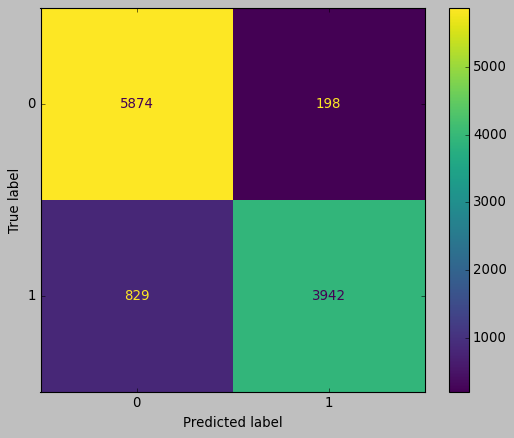

In [73]:
style.use('classic')
cm = confusion_matrix(y_test, logpred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = logreg.classes_)
disp.plot()